In [29]:
print('')

In [9]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [10]:
urls = search_images('dolphin photos', max_images=1)
urls[0]

Searching for 'dolphin photos'


'https://fh-sites.imgix.net/sites/51/2017/06/23203957/Dolphin-Headshot.10.jpg'

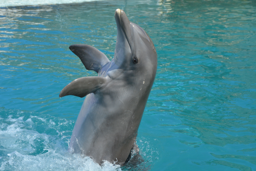

In [11]:
from fastdownload import download_url
dest = 'dolphin.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'shark photos'


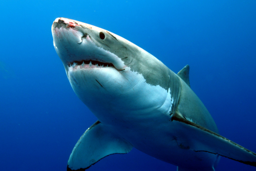

In [12]:
download_url(search_images('shark photos', max_images=1)[0], 'shark.jpg', show_progress=False)
Image.open('shark.jpg').to_thumb(256,256)

In [13]:
searches = 'dolphin','shark'
path = Path('dolphin_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  
    download_images(dest, urls=search_images(f'{o} water photo'))
    sleep(10)

    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'dolphin photo'
Searching for 'dolphin water photo'
Searching for 'shark photo'
Searching for 'shark water photo'


In [14]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


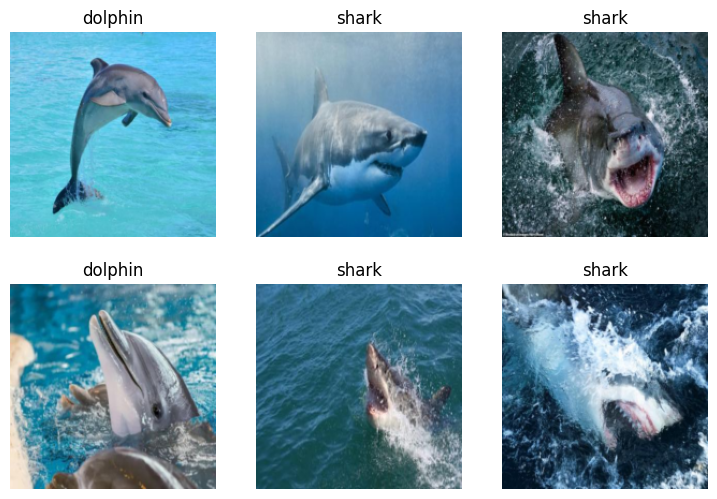

In [15]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [17]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.remove_cb(ProgressCallback)
learn.fine_tune(3)

[0, 1.1271240711212158, 0.6372494101524353, 0.25, '00:02']
[0, 1.2176074981689453, 0.4675837457180023, 0.25, '00:04']
[1, 0.7356278300285339, 0.22473637759685516, 0.1499999761581421, '00:04']
[2, 0.5868942141532898, 0.17293322086334229, 0.10000002384185791, '00:04']


In [42]:
is_dolphin,_,probs = learn.predict(PILImage.create('dolphin.jpg'))
print(f"This is a: {is_dolphin}.")
print(f"Probability it's a dolphin: {probs[0].item():.4f}")

This is a: dolphin.
Probability it's a dolphin: 0.9917
